In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Data fields
Here's a brief version of what you'll find in the data description file.

* SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
* MSSubClass: The building class
* MSZoning: The general zoning classification
* LotFrontage: Linear feet of street connected to property
* LotArea: Lot size in square feet
* Street: Type of road access
* Alley: Type of alley access
* LotShape: General shape of property
* LandContour: Flatness of the property
* Utilities: Type of utilities available
* LotConfig: Lot configuration
* LandSlope: Slope of property
* Neighborhood: Physical locations within Ames city limits
* Condition1: Proximity to main road or railroad
* Condition2: Proximity to main road or railroad (if a second is present)
* BldgType: Type of dwelling
* HouseStyle: Style of dwelling
* OverallQual: Overall material and finish quality
* OverallCond: Overall condition rating
* YearBuilt: Original construction date
* YearRemodAdd: Remodel date
* RoofStyle: Type of roof
* RoofMatl: Roof material
* Exterior1st: Exterior covering on house
* Exterior2nd: Exterior covering on house (if more than one material)
* MasVnrType: Masonry veneer type
* MasVnrArea: Masonry veneer area in square feet
* ExterQual: Exterior material quality
* ExterCond: Present condition of the material on the exterior
* Foundation: Type of foundation
* BsmtQual: Height of the basement
* BsmtCond: General condition of the basement
* BsmtExposure: Walkout or garden level basement walls
* BsmtFinType1: Quality of basement finished area
* BsmtFinSF1: Type 1 finished square feet
* BsmtFinType2: Quality of second finished area (if present)
* BsmtFinSF2: Type 2 finished square feet
* BsmtUnfSF: Unfinished square feet of basement area
* TotalBsmtSF: Total square feet of basement area
* Heating: Type of heating
* HeatingQC: Heating quality and condition
* CentralAir: Central air conditioning
* Electrical: Electrical system
* 1stFlrSF: First Floor square feet
* 2ndFlrSF: Second floor square feet
* LowQualFinSF: Low quality finished square feet (all floors)
* GrLivArea: Above grade (ground) living area square feet
* BsmtFullBath: Basement full bathrooms
* BsmtHalfBath: Basement half bathrooms
* FullBath: Full bathrooms above grade
* HalfBath: Half baths above grade
* Bedroom: Number of bedrooms above basement level
* Kitchen: Number of kitchens
* KitchenQual: Kitchen quality
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
* Functional: Home functionality rating
* Fireplaces: Number of fireplaces
* FireplaceQu: Fireplace quality
* GarageType: Garage location
* GarageYrBlt: Year garage was built
* GarageFinish: Interior finish of the garage
* GarageCars: Size of garage in car capacity
* GarageArea: Size of garage in square feet
* GarageQual: Garage quality
* GarageCond: Garage condition
* PavedDrive: Paved driveway
* WoodDeckSF: Wood deck area in square feet
* OpenPorchSF: Open porch area in square feet
* EnclosedPorch: Enclosed porch area in square feet
* 3SsnPorch: Three season porch area in square feet
* ScreenPorch: Screen porch area in square feet
* PoolArea: Pool area in square feet
* PoolQC: Pool quality
* Fence: Fence quality
* MiscFeature: Miscellaneous feature not covered in other categories
* MiscVal: $Value of miscellaneous feature
* MoSold: Month Sold
* YrSold: Year Sold
* SaleType: Type of sale
* SaleCondition: Condition of sale

In [2]:
![image.png](attachment:image.png)

'[image.png]' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
House_data = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-2/master/Projects/house_data.csv')
House_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
House_data.shape

(1460, 81)

In [5]:
House_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [7]:
House_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


There are 38 numerical columns

In [8]:
House_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [9]:
House_data.columns[House_data.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [10]:
House_data.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [3]:
miss = House_data.isnull().sum()/len(House_data)
miss = miss[miss > 0]
miss.sort_values(inplace = True)
miss

Electrical      0.000685
MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtFinType1    0.025342
BsmtExposure    0.026027
BsmtFinType2    0.026027
GarageCond      0.055479
GarageQual      0.055479
GarageFinish    0.055479
GarageType      0.055479
GarageYrBlt     0.055479
LotFrontage     0.177397
FireplaceQu     0.472603
Fence           0.807534
Alley           0.937671
MiscFeature     0.963014
PoolQC          0.995205
dtype: float64

We can infer that the variable PoolQC has 99.5% missing values followed by MiscFeature, Alley, and Fence. Let's look at a pretty picture explaining these missing values using a bar plot.

In [4]:
#visualising missing values
miss = miss.to_frame()
miss.columns = ['count']
miss.index.names = ['Name']
miss['Name'] = miss.index


In [ ]:
#plot the missing value count
plt.figure(figsize=(10,6))
sns.set(style="whitegrid", color_codes=True)
sns.barplot(x = 'Name', y = 'count', data=miss)
plt.xticks(rotation = 90)
plt.title('Missing Variable')



C:\Users\chawanga\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Distribution of House Price')

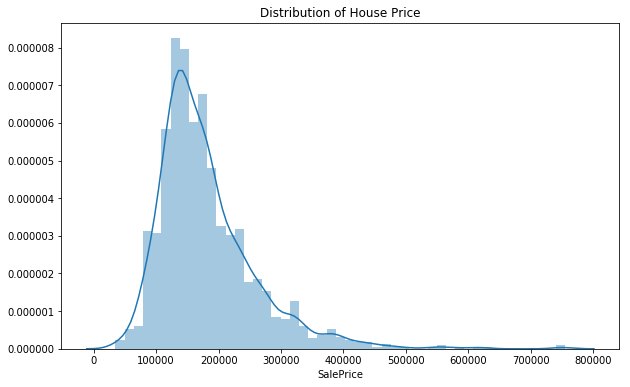

In [5]:
plt.figure(figsize=(10,6))
sns.distplot(House_data['SalePrice'])
plt.title('Distribution of House Price')

We see the target variable SalesPrice has a right-skewed distribution. We will need to transform this variable so that it becomes normally distributed

In [19]:
House_data['SalePrice'].skew()

1.8828757597682129

Let's transform the data and see if this variable gets normally distributed

Skewness is 0.12133506220520406


Text(0.5, 1.0, 'House price after Transformation')

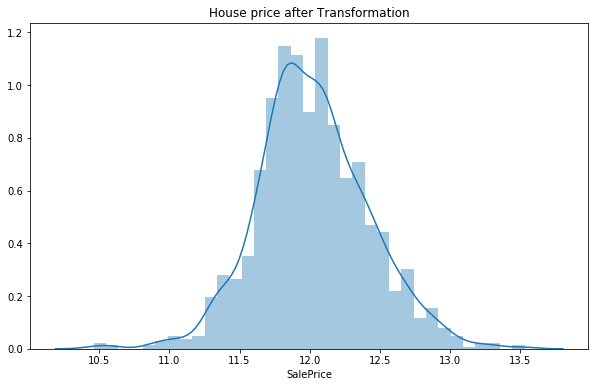

In [6]:
plt.figure(figsize=(10,6))
target = np.log(House_data['SalePrice'])
print ('Skewness is', target.skew())
sns.distplot(target)
plt.title('House price after Transformation')

As you saw, log transformation of the target variable has helped us fixing its skewed distribution and the new distribution looks closer to normal. Since we have 80 variables, visualizing one by one wouldn't be an astute approach. Instead, we'll look at some variables based on their correlation with the target variable. However, there's a way to plot all variables at once, and we'll look at it as well. Moving forward, we'll separate numeric and categorical variables and explore this data from a different angle.

In [7]:
numeric_data = House_data.select_dtypes(include=[np.number])
cat_data = House_data.select_dtypes(exclude=[np.number])
print ("There are {} numeric and {} categorical columns in House_data".format(numeric_data.shape[1],cat_data.shape[1]))

There are 38 numeric and 43 categorical columns in House_data


In [27]:
del numeric_data['Id']

Now, we are interested to learn about the correlation behavior of numeric variables. Out of 38 variables, I presume some of them must be correlated. If found, we can later remove these correlated variables as they won't provide any useful information to the model.

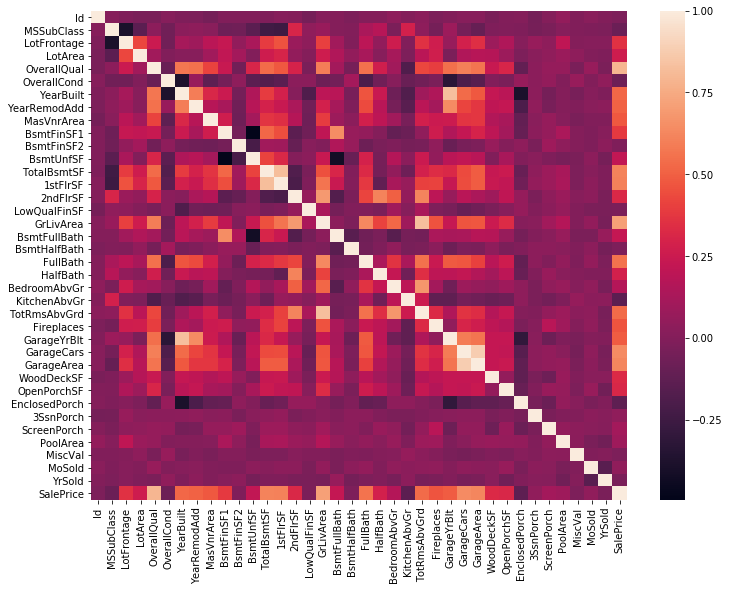

In [8]:
#correlation plot
f, ax = plt.subplots(figsize=(12, 9))
corr = numeric_data.corr()
sns.heatmap(corr)

It's a nice overview, but oh man is that a lot of data to look at. Let's zoom into the top 10 features most related to Sale Price.

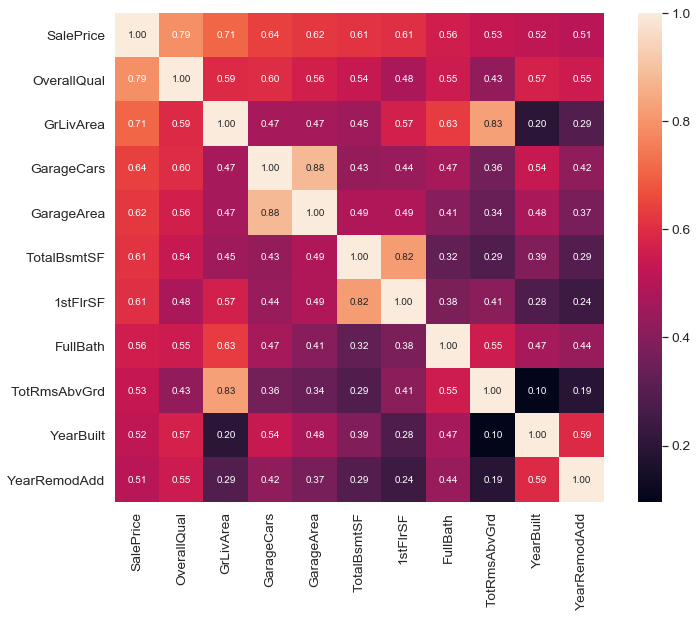

In [13]:
f, ax = plt.subplots(figsize=(12, 9))
k = 11                          #number of variables for heatmap
cols = corr.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(House_data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [14]:
most_corr = pd.DataFrame(cols)
most_corr.columns = ['Most Correlated Features']
most_corr

,Most Correlated Features
0,SalePrice
1,OverallQual
2,GrLivArea
3,GarageCars
4,GarageArea
5,TotalBsmtSF
6,1stFlrSF
7,FullBath
8,TotRmsAbvGrd
9,YearBuilt


Well, the most correlated feature to Sale Price is... Sale Price?!? Of course. For the other 9, they are as listed. Here is a short description of each. (Thank you, data_description.txt!)

OverallQual: Rates the overall material and finish of the house (1 = Very Poor, 10 = Very Excellent)
GrLivArea: Above grade (ground) living area square feet
GarageCars: Size of garage in car capacity
GarageArea: Size of garage in square feet
TotalBsmtSF: Total square feet of basement area
1stFlrSF: First Floor square feet
FullBath: Full bathrooms above grade
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
YearBuilt: Original construction date
Let's take a look at how each relates to Sale Price and do some pre-cleaning on each feature if necessary.

In [15]:
print (corr['SalePrice'].sort_values(ascending=False)[:15], '\n')                      #top 15 values
print ('----------------------')
print (corr['SalePrice'].sort_values(ascending=False)[-5:])                      #last 5 values`

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
Name: SalePrice, dtype: float64 

----------------------
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


Here we see that the OverallQual feature is 79% correlated with the target variable. Overallqual feature refers to the overall material and quality of the materials of the completed house. Well, this make sense as well. People usually consider these parameters for their dream house. In addition, GrLivArea is 70% correlated with the target variable. GrLivArea refers to the living area (in sq ft.) above ground. The following variables show people also care about if the house has a garage, the area of that garage, the size of the basement area, etc.

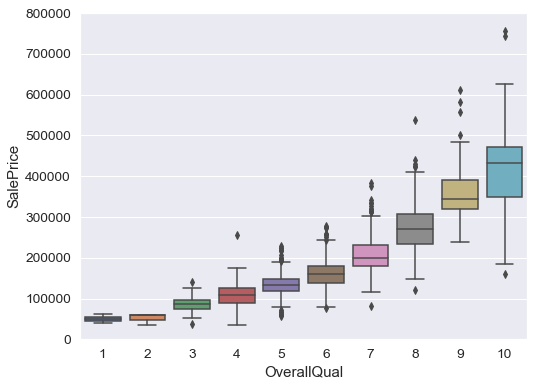

In [16]:
var = 'OverallQual'
data = pd.concat([House_data['SalePrice'], House_data[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

People pay more for better quality? Nothing new here. Let's move on.

Here we see that the OverallQual feature is 79% correlated with the target variable. Overallqual feature refers to the overall material and quality of the materials of the completed house. Well, this make sense as well. People usually consider these parameters for their dream house. In addition, GrLivArea is 70% correlated with the target variable. GrLivArea refers to the living area (in sq ft.) above ground. The following variables show people also care about if the house has a garage, the area of that garage, the size of the basement area, etc. Let's check the OverallQual variable in detail.

In [23]:
House_data['OverallQual'].unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2], dtype=int64)

The overall quality is measured on a scale of 1 to 10. Hence, we can fairly treat it as an ordinal variable. An ordinal variable has an inherent order. For example, Rank of students in class, data collected on Likert scale, etc. Let's check the median sale price of houses with respect to OverallQual. You might be wondering, “Why median ?” We are using median because the target variable is skewed. A skewed variable has outliers and median is robust to outliers.

We can create such aggregated tables using pandas pivot tables quite easily.

In [44]:
#let's check the mean price per quality and plot it.
pivot = House_data.pivot_table(index='OverallQual', values='SalePrice', aggfunc=np.median)
pivot

,SalePrice
OverallQual,
1,50150
2,60000
3,86250
4,108000
5,133000
6,160000
7,200141
8,269750
9,345000


Let's plot this table and understand the median behavior using a bar graph.

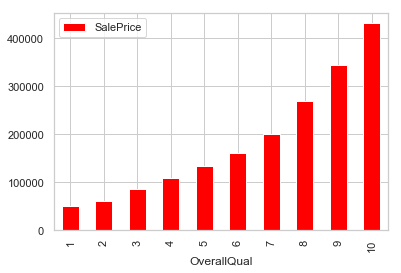

In [25]:
pivot.plot(kind='bar', color='red')

C:\Users\chawanga\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


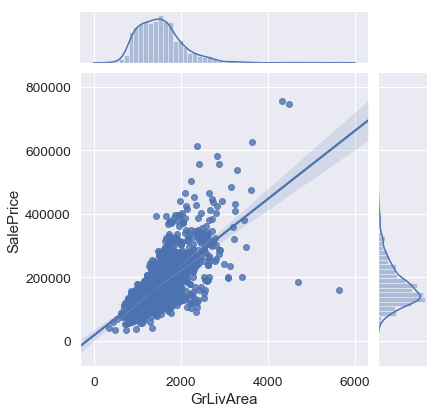

In [26]:
#GrLivArea variable
sns.jointplot(x=House_data['GrLivArea'], y=House_data['SalePrice'], kind = 'reg')

As seen above, here also we see a direct correlation of living area with sale price. However, we can spot an outlier value GrLivArea > 5000. I've seen outliers play a significant role in spoiling a model's performance. Hence, we'll get rid of it. If you are enjoying this activity, you can visualize other correlated variables as well. Now, we'll move forward and explore categorical features. The simplest way to understand categorical variables is using .describe() command.

This behavior is quite normal. As the overall quality of a house increases, its sale price also increases. Let's visualize the next correlated variable GrLivArea and understand their behavior.

It makes sense that people would pay for the more living area. What doesn't make sense is the two datapoints in the bottom-right of the plot.

We need to take care of this! What we will do is remove these outliers manually.

In [35]:
#removing outliers
House_data.drop(House_data[House_data['GrLivArea'] > 4000].index, inplace=True)
House_data.shape                                                                                #removed 4 rows`

(1456, 81)

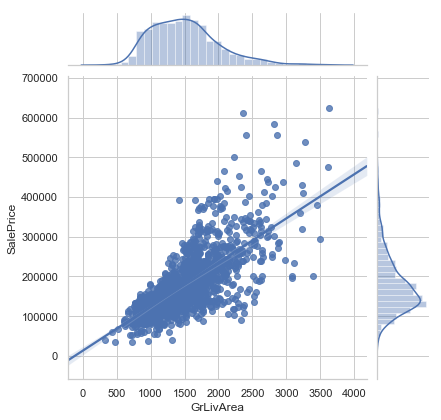

In [36]:
sns.jointplot(x=House_data['GrLivArea'], y=House_data['SalePrice'], kind = 'reg')

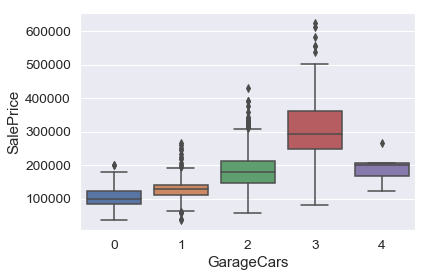

In [31]:
# Garage Area vs Sale Price
sns.boxplot(x=House_data['GarageCars'], y=House_data['SalePrice'])

In [55]:
House_data['GarageYrBlt'].fillna(0 , inplace = True)

In [61]:
House_data['GarageYrBlt'].isnull().sum()

0

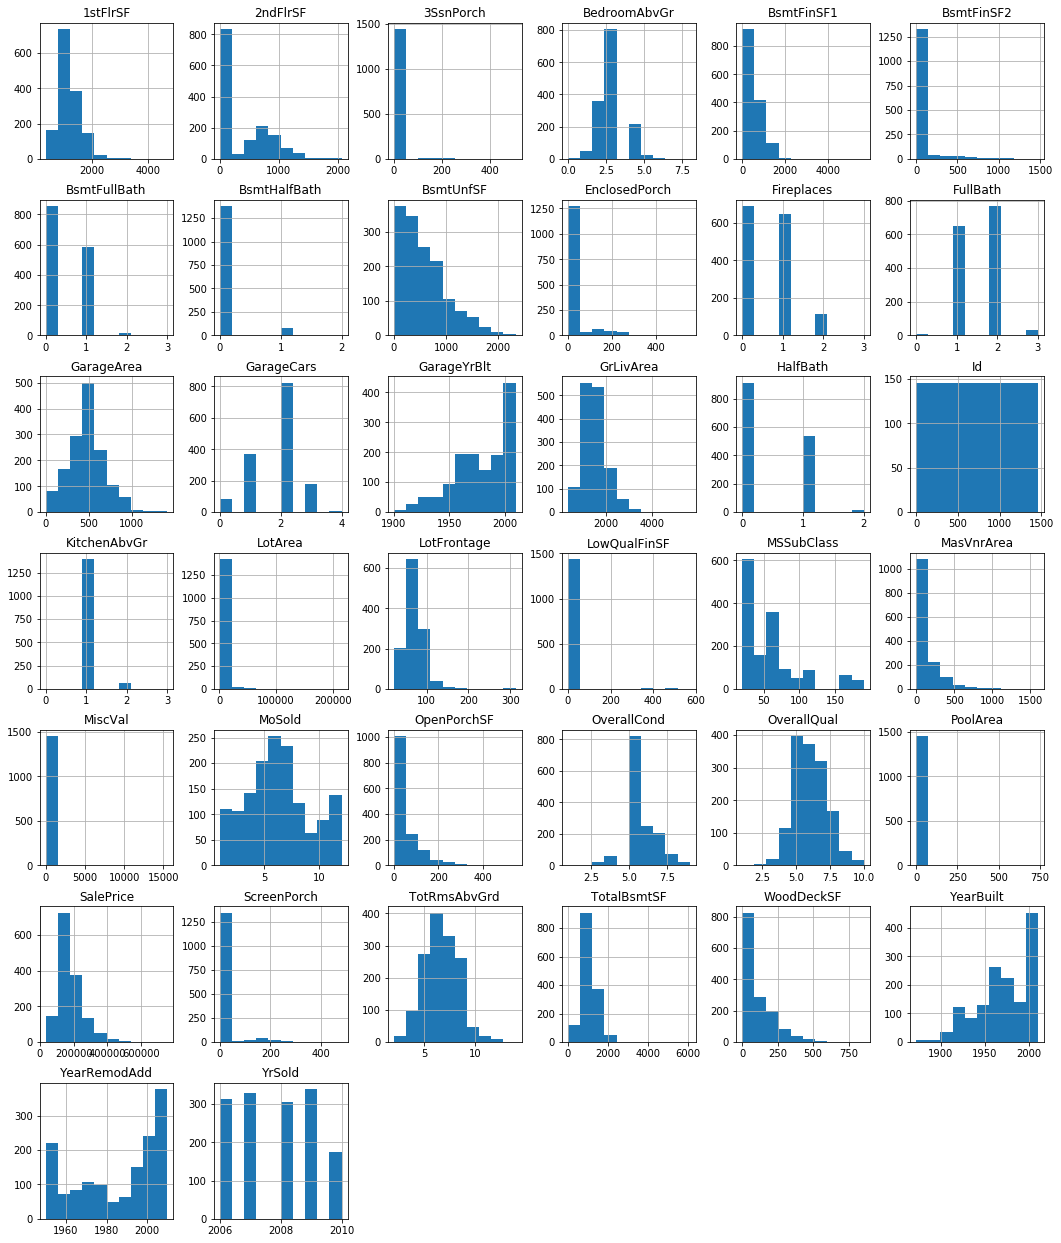

In [5]:
House_data.hist(figsize=(18,22))
plt.show()

4-car garages result in less Sale Price? That doesn't make much sense. Let's remove those outliers.

House_data['SalePrice'].describe()

average house price of $180921

In [32]:
House_data = House_data.drop(House_data[(House_data['GarageCars']>3) 
                         & (House_data['SalePrice']<300000)].index).reset_index(drop=True)

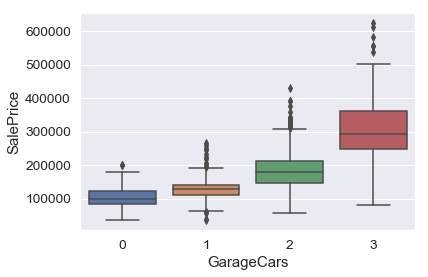

In [33]:
# Garage Area vs Sale Price
sns.boxplot(x=House_data['GarageCars'], y=House_data['SalePrice'])

That looks much better. Note: removal of data is totally discretionary and may or may not help in modeling. Use at your own preference.

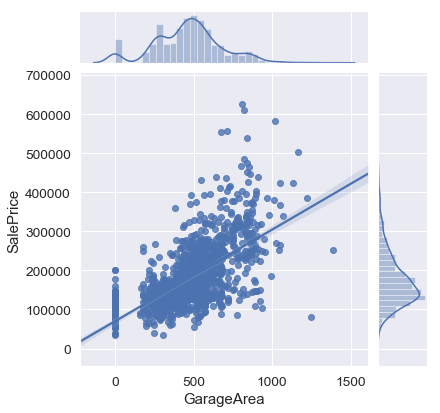

In [34]:
# Garage Area vs Sale Price
sns.jointplot(x=House_data['GarageArea'], y=House_data['SalePrice'], kind='reg')

Again with the bottom two data-points. Let's remove those outliers.

In [35]:
# Removing outliers manually (More than 1000 sqft, less than $300k)
House_data = House_data.drop(House_data[(House_data['GarageArea']>1000) 
                         & (House_data['SalePrice']<300000)].index).reset_index(drop=True)

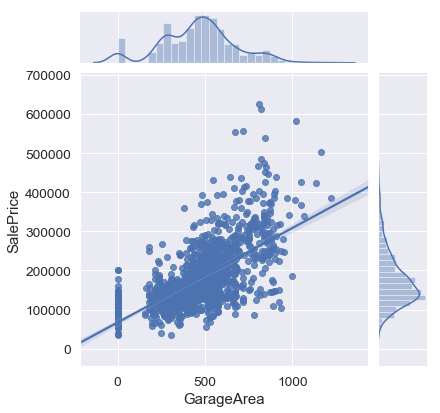

In [36]:
# Garage Area vs Sale Price
sns.jointplot(x=House_data['GarageArea'], y=House_data['SalePrice'], kind='reg')

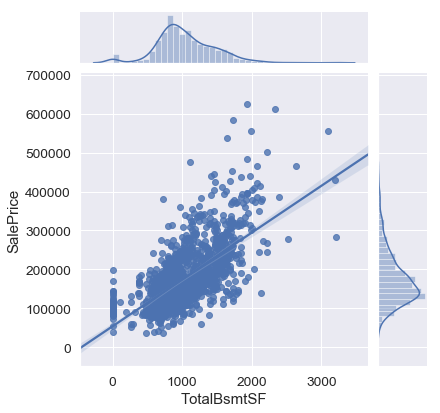

In [37]:
# Basement Area vs Sale Price
sns.jointplot(x=House_data['TotalBsmtSF'], y=House_data['SalePrice'], kind='reg')

Everything looks fine here.

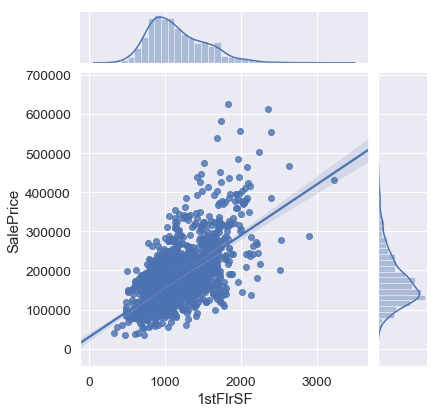

In [38]:
# First Floor Area vs Sale Price
sns.jointplot(x=House_data['1stFlrSF'], y=House_data['SalePrice'], kind='reg')

Looks good.

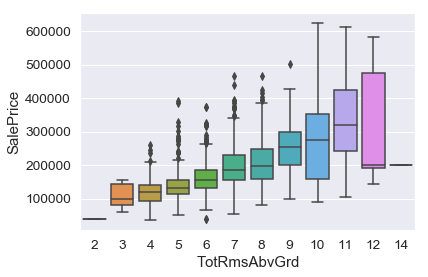

In [39]:
# Total Rooms vs Sale Price
sns.boxplot(x=House_data['TotRmsAbvGrd'], y=House_data['SalePrice'])

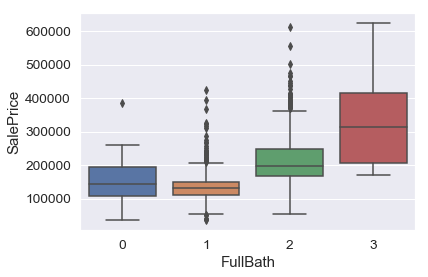

In [62]:
sns.boxplot(x=House_data['FullBath'], y=House_data['SalePrice'])

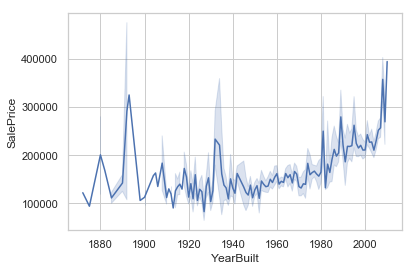

In [38]:
# YearBuilt vs Sale Price

sns.lineplot(x=House_data['YearBuilt'], y=House_data['SalePrice'])

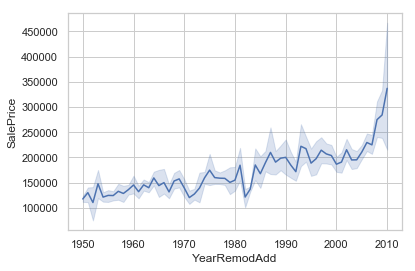

In [41]:
sns.lineplot(x=House_data['YearRemodAdd'], y=House_data['SalePrice'])

In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [88]:
data = pd.DataFrame(House_data[['OverallQual','GrLivArea','GarageCars','TotalBsmtSF','1stFlrSF','FullBath','TotRmsAbvGrd','YearBuilt','GarageYrBlt']])
data=data.transpose()
data

,0,1,2,3,4,5,6,7,8,9,...,1450,1451,1452,1453,1454,1455,1456,1457,1458,1459
OverallQual,7.0,6.0,7.0,7.0,8.0,5.0,8.0,7.0,7.0,5.0,...,5.0,8.0,5.0,5.0,7.0,6.0,6.0,7.0,5.0,5.0
GrLivArea,1710.0,1262.0,1786.0,1717.0,2198.0,1362.0,1694.0,2090.0,1774.0,1077.0,...,1792.0,1578.0,1072.0,1140.0,1221.0,1647.0,2073.0,2340.0,1078.0,1256.0
GarageCars,2.0,2.0,2.0,3.0,3.0,2.0,2.0,2.0,2.0,1.0,...,0.0,3.0,2.0,0.0,2.0,2.0,2.0,1.0,1.0,1.0
TotalBsmtSF,856.0,1262.0,920.0,756.0,1145.0,796.0,1686.0,1107.0,952.0,991.0,...,896.0,1573.0,547.0,1140.0,1221.0,953.0,1542.0,1152.0,1078.0,1256.0
1stFlrSF,856.0,1262.0,920.0,961.0,1145.0,796.0,1694.0,1107.0,1022.0,1077.0,...,896.0,1578.0,1072.0,1140.0,1221.0,953.0,2073.0,1188.0,1078.0,1256.0
FullBath,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,1.0,...,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0
TotRmsAbvGrd,8.0,6.0,6.0,7.0,9.0,5.0,7.0,7.0,8.0,5.0,...,8.0,7.0,5.0,6.0,6.0,7.0,7.0,9.0,5.0,6.0
YearBuilt,2003.0,1976.0,2001.0,1915.0,2000.0,1993.0,2004.0,1973.0,1931.0,1939.0,...,1974.0,2008.0,2005.0,2006.0,2004.0,1999.0,1978.0,1941.0,1950.0,1965.0
GarageYrBlt,2003.0,1976.0,2001.0,1998.0,2000.0,1993.0,2004.0,1973.0,1931.0,1939.0,...,0.0,2008.0,2005.0,0.0,2004.0,1999.0,1978.0,1941.0,1950.0,1965.0


In [91]:
import sklearn; print(sklearn.__file__)

C:\Users\chawanga\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\__init__.py


In [ ]:
!pip uninstall scikit-learn

In [ ]:
!pip install scikit-learn

In [ ]:
from skle

In [17]:
from sklearn.ensemble import RandomForestClassifier
def rf():
    rfc = RandomForestClassifier(n_estimators=600)
    return rfc
rfc = rf()

In [18]:
def rf():
    return rfc.fit(X_train,y_train)
rf()

NameError: name 'X_train' is not defined

In [83]:
y = House_data['SalePrice']


In [67]:
from sklearn.model_selection import train_test_split

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

ValueError: Found input variables with inconsistent numbers of samples: [9, 1456]

In [73]:
lm = LinearRegression()

In [74]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [75]:
# The coefficients
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [ 1.93051502e+04  6.19821680e+01  1.19306706e+04  3.42909101e+01
  9.04139930e+00 -1.05411226e+04 -1.38753408e+03  3.99939955e+02]


In [76]:
predictions = lm.predict( X_test)

Text(0, 0.5, 'Predicted Y')

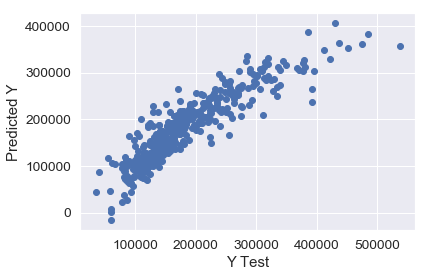

In [77]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [78]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 25175.474748372464
MSE: 1199232714.4366758
RMSE: 34629.93956732636


C:\Users\chawanga\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


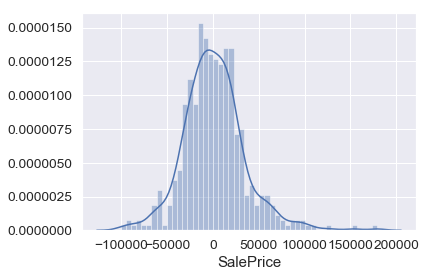

In [69]:
sns.distplot((y_test-predictions),bins=50);

In [79]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
OverallQual,19305.150192
GrLivArea,61.982168
GarageCars,11930.670625
TotalBsmtSF,34.290910
1stFlrSF,9.041399
FullBath,-10541.122566
TotRmsAbvGrd,-1387.534077
YearBuilt,399.939955


In [80]:
from sklearn.model_selection import train_test_split

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [85]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

In [86]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [87]:
predictions = dtree.predict(X_test)

In [88]:
from sklearn.metrics import classification_report,confusion_matrix

In [89]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

       34900       0.00      0.00      0.00         1
       35311       0.00      0.00      0.00         0
       37900       0.00      0.00      0.00         0
       40000       0.00      0.00      0.00         1
       52000       0.00      0.00      0.00         0
       52500       0.00      0.00      0.00         0
       55993       0.00      0.00      0.00         1
       58500       0.00      0.00      0.00         1
       60000       0.00      0.00      0.00         2
       61000       0.00      0.00      0.00         1
       62383       0.00      0.00      0.00         1
       66500       0.00      0.00      0.00         1
       67000       0.00      0.00      0.00         0
       75000       0.00      0.00      0.00         0
       76000       0.00      0.00      0.00         0
       78000       0.00      0.00      0.00         1
       79000       0.00      0.00      0.00         2
       80000       0.00    

C:\Users\chawanga\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\chawanga\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\chawanga\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\chawanga\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to

In [90]:
print(confusion_matrix(y_test,predictions))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [91]:
from sklearn.ensemble import RandomForestClassifier

In [92]:
rfc = RandomForestClassifier(n_estimators=600)

In [ ]:
rfc.fit(X_train,y_train)